<a href="https://colab.research.google.com/github/zniero1324/Programming-Assignment-2-Cardiovascular-Examination/blob/main/BusinessReport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Medical Examination of Cardiovascular Business Report.**

## **Overview**



One of the health issues the world is Cardiovascular Disease. Example of Cardiovascular disease are heart disease, stroke, and smoking are the top reason of death in the world. To prevent Cardiovascular health, researchers tried to check their health through lifestyle choices and medical intervention when necessary. Providing them the opportunity to prevent the cause of cardiovascular disease.

## **Problem solving methodology**



1.   State the problem clearly
2.   Describe the input and output information
3.   Work the problem by hand
4.   Develop an algorithm
5.   Convert algorithm/psedocode in to python code
6.   Test solution with a variety of data










#**Problem statement**

Cardiovascular health is a key determinant of overall health and well-being. We seek to investigate gender, body mass index, Body Mass index and cholesterol, and Smoking and active person in relation with cardiovascular health. This analysis is driven on how to better understand the causes of cardio vascular disease.


This analysis uncover valuable insights regarding the relationship between demographics,
health, and lifestyle factors in relation to cardiovascular disease by analysing the cardiac health dataset. This exploration will provide a good insight to the people who are suffering cardiovascular disease.

#**Inputs and Outputs Analysis**

**Inputs for Analysis:**

Medical Examination dataset as SQLite database

**Outputs:**

**Data Analysis 1: Exploring the relationship between Cardiovascular Health Disease and gender.**

1.   Analysis of the distribution of medical examination based on their cardio.
2.   Analysis of the distribution of medical examination based on their gender.

**Data Analysis 2: Exploring the relationship between Cardiovascular Health Disease and Body Max Index.**

1.   Analysis of the distribution of medical examination based on their cardio.
2.   Analysis of the distribution of medical examination based on their average BMI.

**Data Analysis 3: Exploring Medical Examination of Body Mass Index Average by Cardio and Cholesterol Analysis**

1.   Analysis of the distribution of medical examination based on their cardio.
2.  Analysis of the distribution of medical examination based on their average BMI.
3.  Analysis of the distribution of medical examination based on their cholesterol level.

**Data Analysis 4: Exploring the relationship between Cardiovascular Health Disease, Smoking and Physical activity**

1.   Analysis of the distribution of medical examination based on their cardio.
2.   Analysis of the distribution of medical examination based on their smoking habits.
3.   Analysis of the distribution of medical examination based on their Physical engagement.




In [ ]:
# @title Medical Examination of Cardiovascular dataset.
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as ipw

connection = sqlite3.connect('cardiohealth.db')
cursor = connection.cursor()

sql = '''
SELECT name FROM sqlite_master WHERE type = 'table';
'''

cursor.execute(sql)
cursor.fetchall()

sql = '''SELECT * FROM medical_examination '''

cursor.execute(sql)

result = cursor.fetchall()

data_frame = pd.read_sql_query(sql, connection)

sql = '''SELECT * FROM medical_examination '''

cursor.execute(sql)

result = cursor.fetchall()

data_frame = pd.read_sql_query(sql, connection)

print(data_frame.head(10))

   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   
5   8  21914       1     151    67.0    120     80            2     2      0   
6   9  22113       1     157    93.0    130     80            3     1      0   
7  12  22584       2     178    95.0    130     90            3     3      0   
8  13  17668       1     158    71.0    110     70            1     1      0   
9  14  19834       1     164    68.0    110     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1

#Data Analysis Report

## **Data Analysis 1: Exploring the relationship between Cardiovascular Health Disease and Gender.**

cardio  disease  non-disease
Female    22613        22909
Male      12362        12105


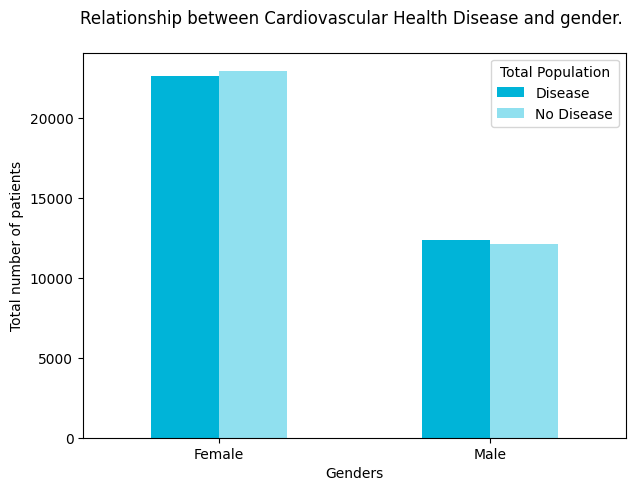

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

connection = sqlite3.connect('cardiohealth.db')
cursor = connection.cursor()

sql = '''SELECT * FROM medical_examination '''

cursor.execute(sql)
result = cursor.fetchall()
data_frame = pd.read_sql_query(sql, connection)


#  @title **Analysis of the distribution of medical examination based on their cardio and gender.**

categories = "gender" # @param ["cardio", "gender"] {allow-input: true}


#filter data
df_filter = data_frame[['gender', 'cardio']]

#Make a copy to avoid copy warning - reference is in Codenote book
df_filter = df_filter.copy()

#Rename the all data
df_filter['gender'] = df_filter['gender'].replace({1:'female', 2:'male'})
df_filter['cardio'] = df_filter['cardio'].replace({0:'non-disease', 1:'disease'})

#Group the dataframe by Gender
df_group_gender = df_filter.groupby([categories])

#Count the total counts of gender distribution to cardio
df_group_gender = df_group_gender.value_counts()

# Reshape the result to have cardio as column name, and row name for gender
df_group_gender = df_group_gender.unstack()


#Check the category if gender or cardio
if categories == 'gender':
  # Remove unknown data
  df_group_gender = df_group_gender.drop([3])
  #Rename the gender index
  df_group_gender.index = ['Female', 'Male']
  df_group_gender.plot.bar(color=['#00b4d8', '#90e0ef'], rot=0, figsize=(7,5))
  plt.xlabel("Genders")
  plt.ylabel("Total number of patients")
  plt.xticks(rotation=0)
  plt.legend(title='Total Population', loc='upper right', labels=['Disease', 'No Disease'])
  print(df_group_gender)
else:
  # Remove unknown data
  df_group_gender = df_group_gender.drop(3, axis=1)

  #Rename the gender index
  df_group_gender.index = ['non-desease', 'desease']
  df_group_gender.plot(kind = 'barh', color=['#00b4d8', '#90e0ef'], rot=0, figsize=(7,5))
  plt.xlabel("Total number of patients")
  plt.ylabel("Freq. of Cardiovascular health medical examination")
  plt.xticks(rotation=0)
  plt.legend(title='Total Population', loc='upper right', labels=['Female', 'Male'])
  print(df_group_gender)

plt.title("Relationship between Cardiovascular Health Disease and gender. \n ")

#Display plot
plt.show()

### **Analysis Discussion - insights gained/observation**

The proportion between the dataset of man and women has a huge different; nonetheless, based on the data, the chances of a men and a women getting a disease the same.

## **Data Analysis 2: Exploring the relationship between Cardiovascular Health Disease and the average Body Max Index.**

       cardio   bmi
0  No disease  27.0
1     Disease  29.0


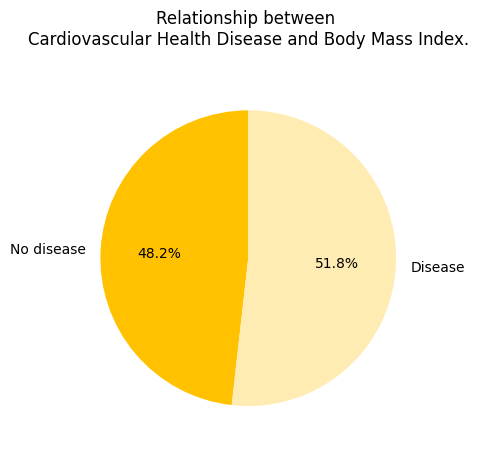

In [2]:
# @title **Analysis of the distribution of medical examination based on their cardio and body mass index.**
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

connection = sqlite3.connect('cardiohealth.db')
cursor = connection.cursor()

sql = '''SELECT * FROM medical_examination '''

cursor.execute(sql)
result = cursor.fetchall()
data_frame = pd.read_sql_query(sql, connection)

#Isolate the only data for the case
df_filter_bmi = data_frame[['cardio','weight','height']]

#Make a copy of the data because I always recieve a copy warning.
df_filter_bmi = df_filter_bmi.copy()

#Create new location for the BMI then do the calculation to retrieve the list of BMI.
df_filter_bmi.loc[:, 'bmi'] = round(df_filter_bmi['weight'] / ((df_filter_bmi['height'] / 100) ** 2), 2)

#Remove uneccessary data after bmi is derived.
df_filter_bmi = df_filter_bmi[['cardio','bmi']]

#Group the cardio into two categories, and provide the average BMI
grouped_data = df_filter_bmi.groupby('cardio')['bmi'].mean().round(0).reset_index()

#Rename the data
grouped_data['cardio'] = ['No disease', 'Disease']

#Display the data
print(grouped_data)

#Visualize the data by using a pie chart
plt.pie(grouped_data['bmi'], labels=['No disease', 'Disease'], colors=['#FFC100', '#FFECB2'], autopct='%1.1f%%', startangle=90)
plt.title(f"Relationship between \nCardiovascular Health Disease and Body Mass Index.\n")

#Display plot
plt.show()

### **Analysis Discussion - insights gained/observation**

Based on the data provided, the average person body mass index doesn't really affect a person getting a Cardiovascular disease.

## **Data Analysis 3: Exploring Medical Examination of Body Mass Index Average by Cardio and Cholesterol Analysis**

                      bmi            
cardio            disease non-disease
cholesterol                          
Above Normal         29.0        28.0
Normal               28.0        26.0
Well Above Normal    30.0        28.0


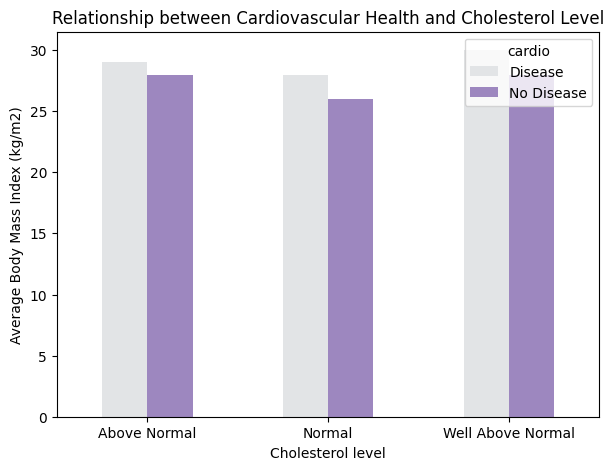

In [6]:
# @title **Analysis of the distribution of medical examination based on their cardio, average bmi, and cholesterol level**
categories = "cholesterol" # @param ["cholesterol", "cardio"] {allow-input: true}
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

connection = sqlite3.connect('cardiohealth.db')
cursor = connection.cursor()

sql = '''SELECT * FROM medical_examination '''

cursor.execute(sql)
result = cursor.fetchall()
data_frame = pd.read_sql_query(sql, connection)

#Retreive the important columns in our data.
dataframe_filter = data_frame[['cardio','weight','height', 'cholesterol']]


#Make a copy so it will not conflict when we do the computation.
dataframe_filter = dataframe_filter.copy()

#Derive the BMI from weight and height, the code is refrence from our previous code.
dataframe_filter.loc[:, 'bmi'] = round(dataframe_filter['weight'] / ((dataframe_filter['height'] / 100) ** 2), 2)

#Filter again, and retrieve the neccessary data only.
new_df = dataframe_filter[['cardio', 'cholesterol','bmi']]

new_df = new_df.copy()

#Rename the numerical values of each category on cholesterol
new_df['cholesterol'] = new_df['cholesterol'].replace({1: 'Normal', 2: 'Above Normal', 3: 'Well Above Normal'})

#Rename the numerical values of each category on cardio
new_df['cardio'] = new_df['cardio'].replace({0: 'non-disease', 1: 'disease'})

if categories == 'cholesterol':
  # Group the data by cholesterol and cardio
  grouped_data = new_df.groupby(['cholesterol', 'cardio'])

  # Calculate the average Body Mass index of each group
  chol_cd_mean = grouped_data.mean().round()

  # Reshape the result to have cadio as column name, and row name for cholesterol
  chol_cd_mean = chol_cd_mean.unstack()

  #display cholesterol level
  print(chol_cd_mean)

  #Visualize the data by using a bar chart
  chol_cd_mean.plot.bar(color=['#e2e4e6', '#9d87bf', '#faeccc'], rot=0, figsize=(7,5))

  plt.xlabel("Cholesterol level")
  plt.ylabel(f"Average Body Mass Index (kg/m2)")
  plt.legend(title=f'cardio', loc='upper right', labels=['Disease', 'No Disease'])

else:
  # Group the data by cholesterol and cardio
  grouped_data = new_df.groupby(['cardio', 'cholesterol'])

  # Calculate the average Body Mass index of each group
  chol_cd_mean = grouped_data.mean().round()

  # Reshape the result to have cadio as column name, and row name for cholesterol
  chol_cd_mean = chol_cd_mean.unstack()

  #display cholesterol level
  print(chol_cd_mean)

  #Visualize the data by using a bar chart
  chol_cd_mean.plot(kind="hist", color=['#e2e4e6', '#9d87bf', '#faeccc'], rot=0, figsize=(7,5))

  plt.ylabel(f"Cardiovascular medical examination result")
  plt.xlabel(f"Average Body Mass Index (kg/m2)")
  plt.legend(title='Cholesterol', loc='upper right', labels=['Normal', 'Above Normal', 'Well Above Normal'])

plt.title(f"Relationship between Cardiovascular Health and Cholesterol Level")

#Display plot
plt.show()


### **Analysis Discussion - insights gained/observation**

A person with a disease, and has a well above Normal cholesterol has a slightly bigger chance of having high BMI, the normal cholesterol will have the least chance of having a high BMI.

## **Data Analysis 4: Exploring the relationship between Cardiovascular Health Disease, Smoking and Physical activity**

smoke                 non-smoker  smoker
cardio      active                      
disease     active         25247    2371
            inactive        6803     558
non-disease active         25852    2791
            inactive        5929     449


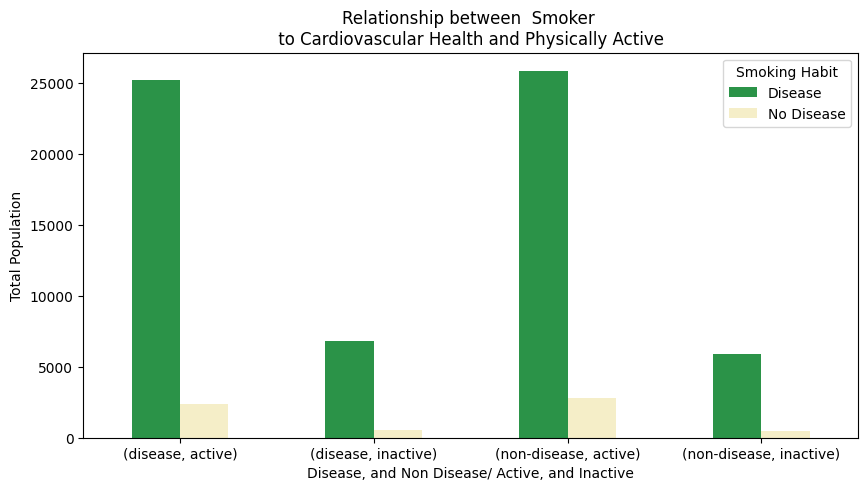

In [8]:
from IPython.core.excolors import ColorScheme
# @title **Analysis of the distribution of medical examination based on their Cardiovascular Health,  Smoking habit, and Physical Activities.**
categories = "smoke" # @param ["cardio", "active", "smoke"]
x = ['cardio', 'active', 'smoke']
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

connection = sqlite3.connect('cardiohealth.db')
cursor = connection.cursor()

sql = '''SELECT * FROM medical_examination '''

cursor.execute(sql)
result = cursor.fetchall()
data_frame = pd.read_sql_query(sql, connection)

color = ['#2b9348', '#F5EEC8', '#d4d700']

#Retreive the important columns in our data.
dataframe_filter = data_frame[['cardio','active', 'smoke']]

#To avoid conflict, because I keep getting warning though my code works
dataframe_filter = dataframe_filter.copy()

dataframe_filter['smoke'] = dataframe_filter['smoke'].replace({0: 'non-smoker', 1: 'smoker'})
dataframe_filter['active'] = dataframe_filter['active'].replace({0: 'inactive', 1: 'active'})
dataframe_filter['cardio'] = dataframe_filter['cardio'].replace({0: 'non-disease', 1: 'disease'})

if categories == 'cardio':
  # Group the data by cardio, smoke and active
  grouped_data = dataframe_filter.groupby(['active', 'smoke','cardio'])

  # Calculate the total population for cardio
  cardio_physical_smoker = grouped_data.size()

  # Reshape the result to have cadio as column name, and row name for cholesterol
  cardio_physical_smoker = cardio_physical_smoker.unstack()

  print(cardio_physical_smoker)

  #Visualize the data by using a bar chart
  cardio_physical_smoker.plot.bar(color=[color[0], color[1], color[2]], rot=0, figsize=(10,5))

  plt.xlabel("Smoker and Non-smoker/ Active and Inactive")
  plt.ylabel(f"Total Population")
  plt.legend(title='Cardio Health', loc='upper right', labels=['Disease', 'No Disease'])
  plt.title(f"Relationship between Cardiovascular Health \n to Smoker, and Physically Active ")

elif categories == 'smoke':
  # Group the data by smoke, cardio and active
  grouped_data = dataframe_filter.groupby(['cardio','active', 'smoke'])

  # Calculate the total population for smoker
  cardio_physical_smoker = grouped_data.size()

  # Reshape the result to have cadio as column name, and row name
  cardio_physical_smoker = cardio_physical_smoker.unstack()

  print(cardio_physical_smoker)

  #Visualize the data by using a bar chart
  cardio_physical_smoker.plot.bar(color=[color[0], color[1], color[2]], rot=0, figsize=(10,5))

  plt.xlabel("Disease, and Non Disease/ Active, and Inactive")
  plt.ylabel(f"Total Population")
  plt.legend(title='Smoking Habit', loc='upper right', labels=['Disease', 'No Disease'])
  plt.title(f"Relationship between  Smoker \n to Cardiovascular Health and Physically Active ")

else:
  # Group the data by active, cardio and smoke.
  grouped_data = dataframe_filter.groupby(['cardio', 'smoke','active'])

  # Calculate the total population for physical engagement.
  cardio_physical_smoker = grouped_data.size()

  # Reshape the result to have cadio as column name, and row name
  cardio_physical_smoker = cardio_physical_smoker.unstack()

  print(cardio_physical_smoker)

  #Visualize the data by using a bar chart.
  cardio_physical_smoker.plot.bar(color=[color[0], color[1], color[2]], rot=0, figsize=(10,5))

  plt.xlabel("Disease, and Non Disease/ smoker, and non-smoker ")
  plt.ylabel(f"Total Population")
  plt.legend(title='Physical Engagement', loc='upper right', labels=['Active', 'Inactive'])
  plt.title(f"Relationship between  Smoker \n to Cardiovascular Health and Physically Active ")


#Display plot
plt.show()